In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

In [19]:

from imblearn.over_sampling import SMOTE

In [20]:
df = pd.read_csv('index.csv')


In [21]:
df.head()
df.shape

(1000, 21)

In [22]:
X = df.iloc[:,1:]
y = df.iloc[:, 0]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:18:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        62
           1       0.82      0.85      0.84       138

    accuracy                           0.77       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.77      0.77      0.77       200

ROC-AUC Score: 0.7902641421224871

XGBoost Evaluation:
              precision    recall  f1-score   support

           0       0.61      0.60      0.60        62
           1       0.82      0.83      0.82       138

    accuracy                           0.76       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.75      0.76      0.75       200

ROC-AUC Score: 0.765895278167368


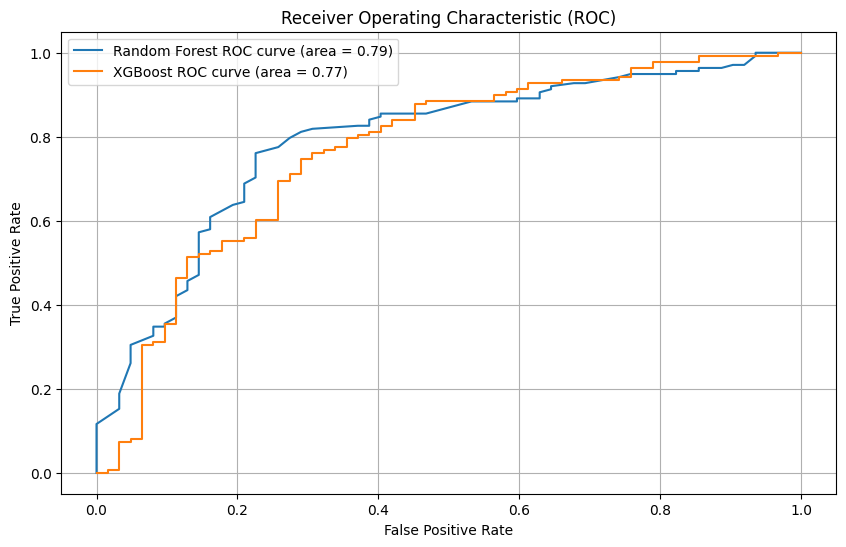

In [24]:
# Standardize features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Oversample using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Calculate class weight ratio
#weight_ratio = y_train.value_counts().iloc[0] / y_train.value_counts().iloc[1]

# Train Random Forest with class weights
#rf = RandomForestClassifier(class_weight={0: 1, 1: weight_ratio}, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)

# Train XGBoost with class weights
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
)
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_rf)}")

# Evaluate XGBoost
print("\nXGBoost Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_xgb)}")

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_rf))

# Plot ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_xgb))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [26]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
TN, FP, FN, TP = cm_rf.ravel()

print(f"True Negatives RF: {TN}")
print(f"False Positives RF: {FP}")
print(f"False Negatives RF: {FN}")
print(f"True Positives RF: {TP}")


print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
TN_xgb, FP_xgb, FN_xgb, TP_xgb = cm_xgb.ravel()

print(f"True Negatives _xgb: {TN_xgb}")
print(f"False Positives _xgb: {FP_xgb}")
print(f"False Negatives _xgb: {FN_xgb}")
print(f"True Positives _xgb: {TP_xgb}")

[[ 37  25]
 [ 21 117]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        62
           1       0.82      0.85      0.84       138

    accuracy                           0.77       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.77      0.77      0.77       200

True Negatives RF: 37
False Positives RF: 25
False Negatives RF: 21
True Positives RF: 117
[[ 37  25]
 [ 24 114]]
              precision    recall  f1-score   support

           0       0.61      0.60      0.60        62
           1       0.82      0.83      0.82       138

    accuracy                           0.76       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.75      0.76      0.75       200

True Negatives _xgb: 37
False Positives _xgb: 25
False Negatives _xgb: 24
True Positives _xgb: 114
